# Natural Language Processing (NLP)
## Codementor Python Machine Learning Class 3

We'll now turn to machine learning applied to text, a.k.a. Natural Language Processing (NLP) or computational linguistics.  We'll use the Reddit 2015 comments dataset for our investigations.

Resources:

(1) Pandas has some useful, basic support for manipulating text.  
        http://pandas.pydata.org/pandas-docs/stable/text.html
        
(2) The Python Natural Language Tookit (nltk), which installed with Anaconda: 
        http://www.nltk.org/
        
(2.5) Spacy is becoming more popular for industrial use
        https://spacy.io/
        
(3) Reference and practice for Regular Expressions (regex): 
        http://regex.learncodethehardway.org/book/
        http://regexr.com/
        
(4) Gensim-- Python library for topic modeling which works alongside NLTK.  Website: https://radimrehurek.com/gensim/index.html
    You can install with the shell command (do it from your Anaconda directory if using windows):
    `python -m pip install gensim`
    

Scenario: Your company, a car manufacturer, wants to use social media to understand current trends in public interest and opinion.  What does the public think about the company's products?  Competitor's products?  You (a data scientist, software developer, or business analyst) have been picked as a team member due to your practical knowledge of machine-learning techniques. You decide to start with an analysis of Reddit comments.  For example: https://www.reddit.com/r/Toyota/   

WARNING: WE WILL BE WORKING WITH UNCENSORED COMMENTS POSTED IN A PUBLIC DISCUSSION FORUM.  SOME OF THESE COMMENTS MAY INCLUDE OFFENSIVE CONTENT.  NEITHER THE INSTRUCTOR NOR ANYONE AT CODEMENTOR CREATED ANY OF THE COMMENTS.  WE HAVE NOT SELECTED ANY OFFENSIVE COMMENTS TO SHOW IN THE CLASS.  OFFENSIVE COMMENTS WHICH MAY APPEAR ARE THE RESULT OF APPLYING ML-ALGORITHMS FOR THE PURPOSE OF TOPIC MODELING AND OPINION MINING.

In [1]:
%matplotlib inline
# allows plotting in cells, we'll use later on.
import pylab
pylab.rcParams['figure.figsize'] = (10, 6) # set a larger figure size

In [2]:
# Ford vs. Toyota
# Topic modeling (unsupervised learning)

In [2]:
import sqlite3
conn = sqlite3.connect('C:/Users/peter/Documents/Codementor/MLClass/data/reddit/database.sqlite')

In [3]:
import pandas

In [4]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'May2015',)]


In [5]:
# List the fields in this table!
query = """
pragma table_info('May2015');
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(0, u'created_utc', u'INTEGER', 0, None, 0), (1, u'ups', u'INTEGER', 0, None, 0), (2, u'subreddit_id', u'', 0, None, 0), (3, u'link_id', u'', 0, None, 0), (4, u'name', u'', 0, None, 0), (5, u'score_hidden', u'', 0, None, 0), (6, u'author_flair_css_class', u'', 0, None, 0), (7, u'author_flair_text', u'', 0, None, 0), (8, u'subreddit', u'', 0, None, 0), (9, u'id', u'', 0, None, 0), (10, u'removal_reason', u'', 0, None, 0), (11, u'gilded', u'int', 0, None, 0), (12, u'downs', u'int', 0, None, 0), (13, u'archived', u'', 0, None, 0), (14, u'author', u'', 0, None, 0), (15, u'score', u'int', 0, None, 0), (16, u'retrieved_on', u'int', 0, None, 0), (17, u'body', u'', 0, None, 0), (18, u'distinguished', u'', 0, None, 0), (19, u'edited', u'', 0, None, 0), (20, u'controversiality', u'int', 0, None, 0), (21, u'parent_id', u'', 0, None, 0)]


In [6]:
query = """
SELECT subreddit,
    body,
    score
    FROM May2015
    WHERE subreddit = '{0}'
"""
# On Reddit, topics are called 'subreddits'
# https://www.reddit.com/r/Toyota/
# https://www.reddit.com/r/Ford/

df_ford = pandas.read_sql(query.format('Ford'), conn)
df_toyota =  pandas.read_sql(query.format('Toyota'), conn)

In [7]:
df_ford.head()

,subreddit,body,score
0,Ford,Yes a bit more definitely. I guess assume I'll...,1
1,Ford,No it's the tube for the intake from the inter...,1
2,Ford,Looks very similar to the Australian Ford Falc...,2
3,Ford,Very hard to find. I prefer them for their uni...,1
4,Ford,No way... you found a Ford in STL???,0


In [8]:
df_ford.describe()

,score
count,1471.000000
mean,1.822570
std,2.250426
min,-22.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,35.000000


In [9]:
df_toyota.head()

,subreddit,body,score
0,Toyota,What kind of truck? Is that the wrong question...,1
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1
2,Toyota,Those are a good truck though. I used to sell ...,1
3,Toyota,"Time can do as much damage as miles though, mo...",2
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1


In [10]:
df_toyota.describe()

,score
count,1094.000000
mean,1.739488
std,1.654171
min,-4.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24.000000


In [11]:
# save out data frames so interested parties can skip the 30 GB database
# df_toyota.to_csv("C:/Users/peter/CM-ML-Class/3/data/toyota.csv", index=False, index_label=False, encoding='utf-8')
# df_ford.to_csv("C:/Users/peter/CM-ML-Class/3/data/ford.csv", index=False, index_label=False, encoding='utf-8')

In [4]:
# here's how to read csv's into a DataFrame:
# df_toyota = pandas.read_csv("C:/Users/peter/CM-ML-Class/3/data/toyota.csv")
# df_ford = pandas.read_csv("C:/Users/peter/CM-ML-Class/3/data/ford.csv")
import pandas
df_toyota = pandas.read_csv("toyota.csv")
df_ford = pandas.read_csv("ford.csv")

In [5]:
df_toyota.head()

,subreddit,body,score
0,Toyota,What kind of truck? Is that the wrong question...,1
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1
2,Toyota,Those are a good truck though. I used to sell ...,1
3,Toyota,"Time can do as much damage as miles though, mo...",2
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1


In [6]:
df = pandas.concat([df_ford, df_toyota])

In [7]:
df.head()

,subreddit,body,score
0,Ford,Yes a bit more definitely. I guess assume I'll...,1
1,Ford,No it's the tube for the intake from the inter...,1
2,Ford,Looks very similar to the Australian Ford Falc...,2
3,Ford,Very hard to find. I prefer them for their uni...,1
4,Ford,No way... you found a Ford in STL???,0


In [8]:
df.tail()

,subreddit,body,score
1089,Toyota,I'm super excited to finally get it. For a co...,2
1090,Toyota,"If you're going to have to wait for delivery, ...",2
1091,Toyota,"Hey, I'm in a similar situation in looking to ...",1
1092,Toyota,http://www.crutchfield.com,1
1093,Toyota,If you upgrade the door speakers be sure to pu...,1


In [9]:
df.describe()

,score
count,2565.000000
mean,1.787135
std,2.017839
min,-22.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,35.000000


# Sentiment analysis
VADER is a sentiment analyzer included with NLTK.  It scores sentences by bouncing key words and even emoticons against its dictionary.  It has a list of negation words, e.g. "not" to handle phrases like "not good".  It also has a "booster dictionary" of words e.g. "very" to handle phrase like "very good".  VADER does its own text pre-processing, so data prep not required when using VADER.  However, you may have to make changes to the source code if it doesn't do a good job in your text domain.

References:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text. Eighth International Conference on
Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

Source code: http://www.nltk.org/_modules/nltk/sentiment/vader.html

In [ ]:
from nltk.sentiment import vader

In [ ]:
import nltk
nltk.download()
sia = vader.SentimentIntensityAnalyzer()

Let's try a few examples:

In [ ]:
sia.polarity_scores("Worst car I ever drove.")

The 'compound' is the overall sentiment score, which can range from -1 to 1.

In [ ]:
sia.polarity_scores("Worst car I ever drove. :)")

In [ ]:
sia.polarity_scores("Best car I ever drove. :)")

Let's score the entire data set:

In [ ]:
df['sentiment'] = df.body.apply(lambda x: sia.polarity_scores(x)['compound'])

In [133]:
df.head()

,subreddit,body,score,sentiment
0,Ford,Yes a bit more definitely. I guess assume I'll...,1,0.8755
1,Ford,No it's the tube for the intake from the inter...,1,-0.2973
2,Ford,Looks very similar to the Australian Ford Falc...,2,0.0000
3,Ford,Very hard to find. I prefer them for their uni...,1,-0.1761
4,Ford,No way... you found a Ford in STL???,0,-0.4098


And do a quick graphical comparison:

subreddit
Ford      Axes(0.125,0.125;0.775x0.775)
Toyota    Axes(0.125,0.125;0.775x0.775)
Name: sentiment, dtype: object

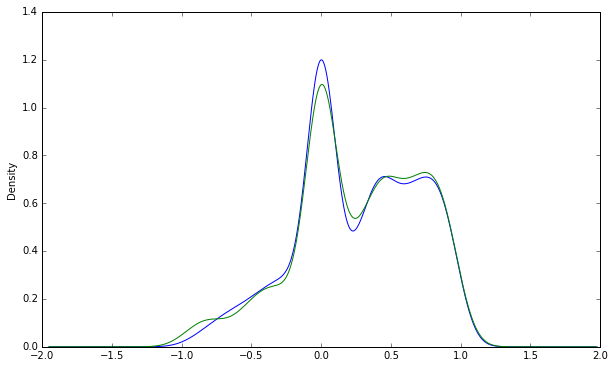

In [136]:
df.groupby(by='subreddit').sentiment.plot.kde()

# Data prep: Tokenize, remove stop words, and stem.

# Tokenize
This means breaking documents into sentences and sentences into words.
What's the right tokenizer for our data?
See www.nltk.org/api/nltk.tokenize.html

In [18]:
# old school
x = "A very simple example."
x.split(' ')

['A', 'very', 'simple', 'example.']

In [19]:
x = df.iloc[222]['body']
x


u'Gotta love Ford blue.'

In [20]:
x.split(' ')

[u'Gotta', u'love', u'Ford', u'blue.']

In [21]:
x = df.iloc[2224]['body']
x.split(' ')

[u'What',
 u'did',
 u'you',
 u'have',
 u'to',
 u'do',
 u'repair/maintenance',
 u'wise',
 u'during',
 u'your',
 u'ownership?']

In [22]:
import nltk
nltk.download()
# http://www.nltk.org/data.html

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
word_tokenize(x)

[u'What',
 u'did',
 u'you',
 u'have',
 u'to',
 u'do',
 u'repair/maintenance',
 u'wise',
 u'during',
 u'your',
 u'ownership',
 u'?']

In [25]:
from nltk.tokenize import TreebankWordTokenizer

In [26]:
TreebankWordTokenizer().tokenize(x)

[u'What',
 u'did',
 u'you',
 u'have',
 u'to',
 u'do',
 u'repair/maintenance',
 u'wise',
 u'during',
 u'your',
 u'ownership',
 u'?']

In [37]:
from nltk.tokenize import TweetTokenizer

In [38]:
TweetTokenizer().tokenize(x)

[u'Gm',
 u'makes',
 u'the',
 u'Le',
 u'Mans',
 u'vette',
 u'...',
 u"That's",
 u'super',
 u'right',
 u'?',
 u';)']

In [39]:
df.iloc[1011]['body']

u"Gm makes the Le Mans vette... That's super right? ;) "

In [40]:
x=df.iloc[1011]['body']

In [41]:
TweetTokenizer().tokenize(x)

[u'Gm',
 u'makes',
 u'the',
 u'Le',
 u'Mans',
 u'vette',
 u'...',
 u"That's",
 u'super',
 u'right',
 u'?',
 u';)']

In [42]:
TreebankWordTokenizer().tokenize(x)

[u'Gm',
 u'makes',
 u'the',
 u'Le',
 u'Mans',
 u'vette',
 u'...',
 u'That',
 u"'s",
 u'super',
 u'right',
 u'?',
 u';',
 u')']

In [43]:
word_tokenize(x)

[u'Gm',
 u'makes',
 u'the',
 u'Le',
 u'Mans',
 u'vette',
 u'...',
 u'That',
 u"'s",
 u'super',
 u'right',
 u'?',
 u';',
 u')']

Looks like the TweetTokenizer is best for our data!  If none of the tokenizers work well for your data, you can always create a custom tokenizer with regular expressions (regex or regexp).

In [44]:
from nltk.tokenize import RegexpTokenizer

In [45]:
regex_caps = '[A-Z]\w+' # capitalized words
regex_emotes = '(?::|;|=)(?:-)?(?:\)|\(|D|P)' # emoticons/smileys
tokenizer_caps = RegexpTokenizer(regex_caps)
tokenizer_emotes = RegexpTokenizer(regex_emotes)

In [46]:
tokenizer_caps.tokenize(x)

[u'Gm', u'Le', u'Mans', u'That']

In [47]:
tokenizer_emotes.tokenize(x)

[u';)']

Let's put both of these together in our own custom tokenizer class.  The `__init__` method will create and store two `RegexpTokenizer` objects.  The `tokenize` method will run both regexp tokenizers and return all the results.

In [49]:
class CapsEmoteTokenizer(object):
    def __init__(self):
        regex_caps = '[A-Z]\w+' # capitalized words
        regex_emotes = '(?::|;|=)(?:-)?(?:\)|\(|D|P)' # emoticons/smileys
        self.tokenizer_caps = RegexpTokenizer(regex_caps)
        self.tokenizer_emotes = RegexpTokenizer(regex_emotes)
        return
    
    def tokenize(self, raw):
        caps = self.tokenizer_caps.tokenize(raw)
        emotes = self.tokenizer_emotes.tokenize(raw)
        answer = caps + emotes
        return answer
    

In [50]:
t = CapsEmoteTokenizer()
t.tokenize(x)

[u'Gm', u'Le', u'Mans', u'That', u';)']

# "Stop Word" removal
A "stop word" is a low-information content word such as "is", "and", "but", etc.  They occur frequently and add no value to the analysis.  Thus, it makes sense to remove them.  The exact list of stop words depends on the data and analysis.  NLTK provides a list of stopwords for starters.

In [51]:
from nltk.corpus import stopwords as stopwordfactory

In [52]:
stopwords = stopwordfactory.words('english')

In [53]:
type(stopwordfactory)

nltk.corpus.reader.wordlist.WordListCorpusReader

In [54]:
type(stopwords)

list

In [55]:
len(stopwords)

153

In [56]:
stopwords[0:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [57]:
x=df.iloc[1012]['body']
tokens = TweetTokenizer().tokenize(x)
tokens

[u'I',
 u'make',
 u'decent',
 u'money',
 u'for',
 u'just',
 u'coming',
 u'out',
 u'of',
 u'college',
 u'and',
 u"I've",
 u'got',
 u'a',
 u"'",
 u'14',
 u'Focus',
 u'Sport',
 u'...',
 u'now',
 u"I'm",
 u'looking',
 u'at',
 u'the',
 u'ST',
 u'with',
 u'hungry',
 u'eyes',
 u'lol']

#### We'll use a **list comprehension** to remove stopwords; here's a quick refresher.
See also: https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions

In [58]:
# list comprehension quick tutorial
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [59]:
mylist = []
for i in range(10):
    mylist.append(2*i)
mylist

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [61]:
[ 2*i for i in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

You can also add a condition

In [63]:
[ 2*i for i in range(10) if i > 5]

[12, 14, 16, 18]

And use any data type:

In [191]:
names = ['Curly', 'Larry', 'Moe', 'Schemp']
[ name + ' is a stooge' for name in names]

['Curly is a stooge',
 'Larry is a stooge',
 'Moe is a stooge',
 'Schemp is a stooge']

#### Now back to our problem

Recipe for removing stopwords from a comment:
Use a list comprehension to cycle through our tokens (words) and create a list.  If the word is in the set of stopwords, don't add it to our list.

In [64]:
[t for t in tokens if t.lower() not in stopwords] # note we don't retain lower case as we need car models caps

[u'make',
 u'decent',
 u'money',
 u'coming',
 u'college',
 u"I've",
 u'got',
 u"'",
 u'14',
 u'Focus',
 u'Sport',
 u'...',
 u"I'm",
 u'looking',
 u'ST',
 u'hungry',
 u'eyes',
 u'lol']

We notice some unimport words for our application; let's add them to the stopwords list in memory.

In [65]:
stopwords += ["i've", "...", "i'm", ".", "'"]

In [66]:
len(stopwords)

158

In [67]:
tokens_stopped = [t for t in tokens if t.lower() not in stopwords]
tokens_stopped

[u'make',
 u'decent',
 u'money',
 u'coming',
 u'college',
 u'got',
 u'14',
 u'Focus',
 u'Sport',
 u'looking',
 u'ST',
 u'hungry',
 u'eyes',
 u'lol']

# Stemming
Often we'll want to only use some sort of root word-- or stem-- in our analysis.  For example, in our present problem, we might want 'selling' & 'sell' to be the same.  This process is called 'stemming'.  (A related but more fundamental mapping is called 'lemmatization'.) NLTK provides us with several stemming options. http://www.nltk.org/api/nltk.stem.html

In [68]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [71]:
porter.stem('selling')

u'sell'

In [73]:
porter.stem('sell')

u'sell'

In [74]:
[porter.stem(t) for t in tokens_stopped] # it messed with our car model name; we'll have to separate out before stemming

[u'make',
 u'decent',
 u'money',
 u'come',
 u'colleg',
 u'got',
 u'14',
 u'Focu',
 u'Sport',
 u'look',
 u'ST',
 u'hungri',
 u'eye',
 u'lol']

In [198]:
from nltk.stem.lancaster import LancasterStemmer
lanc = LancasterStemmer()

In [199]:
[lanc.stem(t) for t in tokens_stopped] # hungri eye or hungry ey lol, literally

[u'mak',
 u'dec',
 u'money',
 u'com',
 u'colleg',
 u'got',
 u'14',
 u'foc',
 u'sport',
 u'look',
 u'st',
 u'hungry',
 u'ey',
 u'lol']

In [200]:
from nltk.stem.snowball import EnglishStemmer
snow = EnglishStemmer()

In [201]:
[lanc.stem(t) for t in tokens_stopped]

[u'mak',
 u'dec',
 u'money',
 u'com',
 u'colleg',
 u'got',
 u'14',
 u'foc',
 u'sport',
 u'look',
 u'st',
 u'hungry',
 u'ey',
 u'lol']

# Now let's process all of our Reddit comments for word analysis!
Proposed algorithm:
1. TweetTokenizer
2. Put caps words aside for safekeeping
3. Remove stop words from both
4. Porter stemmer on lowercase words
5. Add caps words back in

This seems to make sense for our current application.  We can do some diagnostics, see what we get, then modify this algorithm if necessary.   

In [75]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords as StopwordFactory

class CarsDataPrepper:
    def __init__(self):
        self.porter = PorterStemmer()
        regex_caps = '[A-Z]\w+' # capitalized words
        self.tokenizer_caps = RegexpTokenizer(regex_caps)
        self.tokenizer_tweet = TweetTokenizer()
        self.stopwords = StopwordFactory.words('english')
        self.stopwords += ["i've", "...", "i'm", ".", "'", "it's", "/", ")", "(", "]",
                           "[", ",", "!", "?", '"', '-', ':', '*', 'deleted', "|", "^", "#"]
        return
    
    def _tokenize(self, raw):
        caps = self.tokenizer_caps.tokenize(raw)
        allwords = self.tokenizer_tweet.tokenize(raw)
        lowers = [w for w in allwords if w not in caps]
        return caps, lowers
    
    def _removeStopwords(self, caps, lowers):
        lowers_stopped = [w for w in lowers if w.lower() not in self.stopwords]
        caps_stopped = [w for w in caps if w.lower() not in self.stopwords]
        return caps_stopped, lowers_stopped
    
    def prep(self, raw):
        caps, lowers = self._tokenize(raw)
        caps_stopped, lowers_stopped = self._removeStopwords(caps, lowers)
        lowers_stemmed = [self.porter.stem(word) for word in lowers_stopped]
        return caps_stopped + lowers_stemmed
    

In [76]:
prepper = CarsDataPrepper()

Let's test out our data prepper:

In [77]:
x

u"I make decent money for just coming out of college and I've got a '14 Focus Sport.....now I'm looking at the ST with hungry eyes lol"

In [78]:
prepper.prep(x)

[u'Focus',
 u'Sport',
 u'ST',
 u'make',
 u'decent',
 u'money',
 u'come',
 u'colleg',
 u'got',
 u'14',
 u'look',
 u'hungri',
 u'eye',
 u'lol']

In [220]:
prepper.prep("Will the real Slim Shady please stand up?")

['Slim', 'Shady', u'real', u'pleas', u'stand']

In [221]:
# note, prepper.prep is a function (method)
prepper.prep

<bound method CarsDataPrepper.prep of <__main__.CarsDataPrepper instance at 0x0000000011222A88>>

Let's apply the `prep` method to the entire DataFrame, processing all of our comments in one go.  As you can see, we get back a Series:

In [80]:
type(df_ford.body.apply(prepper.prep))

pandas.core.series.Series

We'll name this Series 'words' and tack it on to our DataFrame

In [81]:
df_ford['words'] = df_ford.body.apply(prepper.prep)
df_ford.head()

,subreddit,body,score,words
0,Ford,Yes a bit more definitely. I guess assume I'll...,1,"[Yes, Thanks, bit, definit, guess, assum, I'll..."
1,Ford,No it's the tube for the intake from the inter...,1,"[tube, intak, intercool, keep, eye, check, eng..."
2,Ford,Looks very similar to the Australian Ford Falc...,2,"[Looks, Australian, Ford, Falcon, similar, 2015]"
3,Ford,Very hard to find. I prefer them for their uni...,1,"[hard, find, prefer, uniqu]"
4,Ford,No way... you found a Ford in STL???,0,"[Ford, STL, way, found]"


In [82]:
df_toyota['words'] = df_toyota.body.apply(prepper.prep)
df_toyota.head()

,subreddit,body,score,words
0,Toyota,What kind of truck? Is that the wrong question...,1,"[kind, truck, wrong, question, >, <]"
1,Toyota,"I'm a bit of a traitor here, but it's a Nissan...",1,"[Nissan, Titan, bit, traitor, say, cheap]"
2,Toyota,Those are a good truck though. I used to sell ...,1,"[good, truck, though, use, sell]"
3,Toyota,"Time can do as much damage as miles though, mo...",2,"[Time, much, damag, mile, though, car, isn't, ..."
4,Toyota,"Not gonna lie, I hate it lol. It's more of a p...",1,"[gonna, lie, hate, lol, person, thing, though,..."


# Some basic word analysis
Now that our raw Reddit comments are processed, we can do some very basic but meaningful word counting.  This is a way of characterizing our data set.

In [85]:
listOfordWords = [w for comment in df_ford.words for w in comment]
listOfordWords[0:10]


[u'Yes',
 u'Thanks',
 u'bit',
 u'definit',
 u'guess',
 u'assum',
 u"I'll",
 u'never',
 u'one',
 u"can't"]

In [86]:
len(listOfordWords)

22795

Use Python's set data type to see size of the vocabulary:

In [87]:
len(set(listOfordWords))

4918

It's possible to 'histogram' words using NLTK's frequency distribution:

In [88]:
from nltk import FreqDist

In [89]:
fdist_ford = FreqDist(listOfordWords)

In [90]:
fdist_ford.most_common(30) # we can add to the stopwords at this point

[(u'car', 277),
 (u'get', 259),
 (u'like', 235),
 (u'one', 184),
 (u'look', 178),
 (u'would', 141),
 (u'go', 139),
 (u'new', 135),
 (u'truck', 120),
 (u'Ford', 118),
 (u'drive', 108),
 (u'work', 106),
 (u'year', 100),
 (u'think', 97),
 (u"don't", 94),
 (u'time', 91),
 (u'good', 91),
 (u'thing', 89),
 (u'use', 89),
 (u'much', 88),
 (u'see', 86),
 (u'make', 85),
 (u'know', 84),
 (u'want', 80),
 (u'love', 78),
 (u'realli', 78),
 (u'part', 74),
 (u'engin', 69),
 (u'$', 69),
 (u'got', 66)]

In [91]:
listOtoyWords = [w for comment in df_toyota.words for w in comment]
fdist_toyota = FreqDist(listOtoyWords)


In [92]:
fdist_toyota.most_common(20)

[(u'car', 245),
 (u'get', 175),
 (u'like', 166),
 (u'look', 135),
 (u'one', 127),
 (u'Toyota', 114),
 (u'drive', 105),
 (u'go', 104),
 (u'time', 91),
 (u'would', 89),
 (u'got', 73),
 (u'truck', 72),
 (u"don't", 72),
 (u'good', 72),
 (u'Corolla', 72),
 (u'use', 72),
 (u'realli', 67),
 (u'know', 67),
 (u'work', 61),
 (u'make', 61)]

# Digrams

A digram or bigram means two words which occur together.  NLTK has some functions to find and count them.

In [93]:
from nltk import collocations

In [94]:
c_ford = collocations.BigramCollocationFinder.from_words(listOfordWords)

In [95]:
c_ford.ngram_fd.most_common(20)

[((u'look', u'like'), 24),
 ((u"don't", u'know'), 23),
 ((u'sound', u'like'), 15),
 ((u'new', u'one'), 15),
 ((u'year', u'old'), 13),
 ((u'Focus', u'ST'), 12),
 ((u'brand', u'new'), 11),
 ((u'new', u'truck'), 11),
 ((u'feel', u'like'), 11),
 ((u'pretti', u'much'), 11),
 ((u'someth', u'like'), 10),
 ((u'post', u'r'), 10),
 ((u'get', u'one'), 9),
 ((u'look', u'good'), 9),
 ((u'make', u'sure'), 9),
 ((u"I'd", u'like'), 8),
 ((u'bodi', u'style'), 8),
 ((u'never', u'heard'), 8),
 ((u'r', u'ford'), 7),
 ((u'account', u'less'), 7)]

In [96]:
c_toyota = collocations.BigramCollocationFinder.from_words(listOtoyWords)
c_toyota.ngram_fd.most_common(20)

[((u'time', u'belt'), 22),
 ((u'look', u'like'), 12),
 ((u'sound', u'like'), 10),
 ((u'shift', u'point'), 10),
 ((u"don't", u'know'), 10),
 ((u'floor', u'mat'), 9),
 ((u'look', u'good'), 8),
 ((u'make', u'sure'), 8),
 ((u'Toyota', u'Corolla'), 8),
 ((u'find', u'one'), 8),
 ((u'use', u'car'), 7),
 ((u'head', u'unit'), 7),
 ((u'water', u'pump'), 7),
 ((u'seem', u'like'), 7),
 ((u"don't", u'think'), 6),
 ((u'need', u'replac'), 6),
 ((u"I'd", u'like'), 6),
 ((u'center', u'consol'), 6),
 ((u'fuel', u'economi'), 6),
 ((u'Toyota', u'Toyota'), 6)]

Already, we can see sense some differences between Ford and Toyota topics.  Now, on to some more sophisticated analyses.

# Clustering and TF-IDF
Term-frequency/inverse document frequency (TF-IDF): a measure of word importance in a particular document, relative to a document collection.  0 = appears in all documents. Higher = more important.

We'll use the gensim library to weight our terms with TFIDF, construct a "bag of words" or "sparse" vector model of Reddit comments, then cluster the comments.  We'll be able to see different groups of comments on similar subjects.

In [97]:
from gensim import corpora, models
import gensim

First, construct a dictionary of words.  We'll use our already-prepared data to make the dictionary.  It is a list of ID numbers and words.

In [98]:
dictionary = corpora.Dictionary(df_ford.words)
dictionary.items()

[(4042, u'Friday'),
 (1755, u'Sadly'),
 (4361, u'pardon'),
 (3078, u'mothbal'),
 (4412, u'cakeday'),
 (1971, u'demand'),
 (3777, u'bear'),
 (382, u'yellow'),
 (1859, u'poorli'),
 (627, u'Continental'),
 (4081, u'Relearn'),
 (4497, u'Power'),
 (2492, u'oper'),
 (2486, u'captain'),
 (120, u'hate'),
 (3255, u'giddi'),
 (3044, u'accur'),
 (4446, u'Everyone'),
 (1373, u'sorri'),
 (3338, u'Honda'),
 (4813, u'Watch'),
 (4714, u'85,000'),
 (3469, u'Mostly'),
 (1787, u'Ranger'),
 (1886, u'bike'),
 (91, u'swap'),
 (4505, u'80-90'),
 (1205, u'aux'),
 (4484, u'Mountune'),
 (3799, u'sway'),
 (1024, u'worth'),
 (3880, u'Euro'),
 (624, u'@'),
 (2095, u'digit'),
 (269, u'GT'),
 (349, u'everi'),
 (2657, u'risk'),
 (3775, u'void'),
 (3979, u'mouth'),
 (3438, u'voic'),
 (4063, u'relearn'),
 (1700, u'GF'),
 (2195, u'LittleHelperRobot'),
 (276, u'GA'),
 (1961, u'Henry'),
 (111, u'affect'),
 (2919, u'GM'),
 (518, u"isn't"),
 (4653, u'vast'),
 (2482, u'Dont'),
 (1418, u'four'),
 (125, u"we'll"),
 (4730, u'Gt

Notice, it has the expected length:

In [99]:
len(dictionary.items())

4918

Next, we'll need to build a numerical or vector representation of our Reddit comments. We start by replacing each word in a comment by its ID number, followed by the number of times it occurs in the comment.  The dictionary object
we created has a method for this called `doc2bow`.

In [100]:
x = df_ford.words[0]
print x

[u'Yes', u'Thanks', u'bit', u'definit', u'guess', u'assum', u"I'll", u'never', u'one', u"can't", u'fulli', u'appreci', u'super', u'car', u'allur', u'lesson', u'man']


In [101]:
transformed_x = dictionary.doc2bow(x)
print transformed_x

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


Do this for *all* the comments.  A collection of documents (Reddit comments in our case) is called a corpus.

In [102]:
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(3, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1)],
 [(39, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1)],
 [(61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(72, 1), (73, 1), (74, 1)],
 [(51, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [(86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (9

Now we use TFIDF to weight the words.  As it stands, the number next to each word is the number of times it occurs in the comment.  All we are doing is changing this number to measure the relative importance of the word in the corpus.  

In [103]:
tfidf = models.TfidfModel(corpus) 
type(tfidf)

gensim.models.tfidfmodel.TfidfModel

In [104]:
weighted_corpus = tfidf[corpus]

Let's have a look, comparing the original word list, the encoded word list, and the tfidf-weighted word list:

In [109]:
print df_ford.words[0]
print  "------"
print corpus[0]
print "------"
print weighted_corpus[0]

[u'Yes', u'Thanks', u'bit', u'definit', u'guess', u'assum', u"I'll", u'never', u'one', u"can't", u'fulli', u'appreci', u'super', u'car', u'allur', u'lesson', u'man']
------
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]
------
[(0, 0.18692854984607543), (1, 0.2101542255948645), (2, 0.3834053890178462), (3, 0.20461577431262806), (4, 0.29880260006843207), (5, 0.10541880994605857), (6, 0.19082415903929253), (7, 0.22862604176604798), (8, 0.11862957214541292), (9, 0.18692854984607543), (10, 0.267904613402525), (11, 0.2811153756018794), (12, 0.3834053890178462), (13, 0.2527821253138988), (14, 0.23447280283728636), (15, 0.19503173750623828), (16, 0.19803636488914297)]


Finally, we'll fill in zeros for all the unused words in the vocabulary.  That will make each comment vector the size of the vocabulary, or, 

In [110]:
len(dictionary)

4918

We can put our documents together in a big numerical matrix.  In this representation, the documents are columns:

In [111]:
tfidf_matrix = gensim.matutils.corpus2dense(tfidf[corpus], len(dictionary)) # documents are columns
tfidf_matrix

array([[ 0.18692856,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.21015422,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38340539,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.51767004,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.56705111,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.5710367 ]], dtype=float32)

You will recognize the TFIDF weightings from our sample comment in the first (0th) column:

In [250]:
tfidf_matrix[:,0]  # bag-of words representation

array([ 0.18692856,  0.21015422,  0.38340539, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

#### Clustering experiment - in progress

In [112]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_transform(tfidf_matrix)

In [115]:
clusters.shape

(4918L, 5L)

In [116]:
clusters

array([[ 1.5162975 ,  1.43128189,  2.73981511,  1.30562167,  1.34728472],
       [ 1.4407104 ,  1.39198725,  2.69647316,  1.2182843 ,  1.27499482],
       [ 0.85545366,  0.76977217,  2.45696495,  0.38355888,  0.62220972],
       ..., 
       [ 0.9234628 ,  0.86931151,  2.48146314,  0.51788312,  0.71344254],
       [ 0.95202323,  0.8995928 ,  2.49223274,  0.56709539,  0.7493417 ],
       [ 0.95440253,  0.90211039,  2.49314259,  0.57114584,  0.7565474 ]])

### Document similarity - Bag of Words model

In [251]:
from gensim import corpora, models, similarities
import numpy as np

In [252]:
dictionary = corpora.Dictionary(df_ford.words)

In [253]:
corpus = [dictionary.doc2bow(doc) for doc in df_ford.words]

In [254]:
tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary) 

In [256]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))

"Seed" document, arbitrarily chosen to be doc #0:

In [265]:
df_ford.words.iloc[5]

[u'Look',
 u'Kuga',
 u'Midwest',
 u'closer',
 u'euro',
 u'rather',
 u'odd',
 u'sit',
 u'street']

In [266]:
doc0 = tfidf[corpus[5]]
sim0 = index[doc0]  # similarity of doc #0 to all other docs
print doc0
print 
print sim0

[(52, 0.3231517402823827), (53, 0.3610688595375391), (54, 0.25462204816633066), (55, 0.28523462102722635), (56, 0.3989859787926955), (57, 0.28523462102722635), (58, 0.3388887666379005), (59, 0.3231517402823827), (60, 0.3989859787926955)]

[ 0.  0.  0. ...,  0.  0.  0.]


In [267]:
similars = np.argsort(-sim0)[1:10] 
# top indices not counting itself.  
#Time taken can be reduced using bottleneck.partsort

In [268]:
similars

array([ 906,   50, 1003, 1071,  547,  550,  187,   14, 1083], dtype=int64)

In [263]:
df_ford.iloc[1037]

subreddit                             Ford
body         Thanks man!! I appreciate it 
score                                    1
words               [Thanks, man, appreci]
Name: 1037, dtype: object

In [269]:
 print df_ford.iloc[[ 906,   50, 1003, 1071,  547,  550,  187,   14, 1083]]

     subreddit                                               body  score  \
906       Ford  Literally across the street from where I sit n...      1   
50        Ford  Modern escape isn't even actually an evolution...      5   
1003      Ford  Looking at it closer, I'm thinking it may be a...      1   
1071      Ford    I'd rather run errands in that than the Slocus       0   
547       Ford  Thanks everyone. We called the closer dealer a...      1   
550       Ford  Buy the parts. Look for same in the engine. R+...      4   
187       Ford  Looking clean.\n\n Are blue cars like a theme ...      6   
14        Ford  Aren't Kugas and Escapes the same thing?  Why ...      2   
1083      Ford  The car on the trailer? The one sitting next t...      1   

                                                  words  
906          [Literally, across, street, sit, sad, day]  
50    [Modern, Escape, European, Kuga, Kuga, Escape,...  
1003        [Looking, ZD, Fairlane, closer, think, may]  
1071   

### K-means clusters of bow documents

In [270]:
from sklearn.cluster import KMeans


In [271]:
km = KMeans(n_clusters=10)
km.fit(tfidf_matrix)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [272]:
len(km.labels_)


4918

In [195]:
km.labels_

array([ 8, 17, 17, ...,  1,  1,  1])

In [196]:
import numpy as np

In [197]:
c0word_ids = np.where(km.labels_ == 0)[0]
c0word_ids

array([ 307,  329,  367,  758,  823, 1095, 1917, 1997, 2681, 2707, 4672], dtype=int64)

In [198]:
[dictionary.id2token[i] for i in c0word_ids]

[u'dash',
 u'light',
 u'switch',
 u'lights',
 u'LEDs',
 u'grill',
 u'pictures',
 u'send',
 u'harness',
 u'panel',
 u'bar']

# Latent Dirichlet Allocation (LDA)
"Latent Dirichlet allocation (LDA) is a topic model that generates topics based on word frequency from a set of documents. LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document set."  Very nice information here: https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html

Note there is another completely different LDA-- "Linear Discriminant Analysis"-- which is a classification algorithm.

In [137]:
from gensim import corpora, models
import gensim

In [138]:
dictionary = corpora.Dictionary(df_ford.words)

In [141]:
# encode all comments = a corpus.  "Bag of Words"
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
corpus_tfidf = tfidf[corpus]

In [142]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=10, id2word = dictionary, passes=10)

In [143]:
ldamodel.print_topics(num_topics=10, num_words=5)

[(0, u'0.004*car + 0.003*want + 0.003*go + 0.003*look + 0.003*use'),
 (1, u'0.007*Nice + 0.004*Yes + 0.003*Rangers + 0.003*nice + 0.003*look'),
 (2, u'0.004*fiesta + 0.004*Agreed + 0.003*need + 0.003*like + 0.003*pay'),
 (3, u'0.004*Damn + 0.004*look + 0.004*car + 0.003*fun + 0.003*got'),
 (4, u'0.004*one + 0.003*car + 0.003*new + 0.003*like + 0.003*truck'),
 (5, u'0.003*car + 0.003*one + 0.003*like + 0.002*beauti + 0.002*drive'),
 (6, u'0.004*nice + 0.004*get + 0.003*like + 0.003*car + 0.003*SHO'),
 (7, u'0.005*thank + 0.003*get + 0.003*302 + 0.003*though + 0.003*one'),
 (8, u'0.011*Thanks + 0.004*man + 0.003*run + 0.003*great + 0.003*escap'),
 (9, u'0.002*awesom + 0.002*Yeah + 0.002*year + 0.002*key + 0.002*best')]

In [155]:
# compare to Toyota
dictionary = corpora.Dictionary(df_toyota.words)
corpus = [dictionary.doc2bow(comment) for comment in df_toyota.words]
tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary) 
corpus_tfidf = tfidf[corpus]
ldamodel = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=3, id2word = dictionary, passes=20)
ldamodel.print_topics(num_topics=3, num_words=5)

[(0, u'0.003*car + 0.003*like + 0.002*Thanks + 0.002*great + 0.002*good'),
 (1, u'0.003*Nice + 0.003*look + 0.003*car + 0.003*truck + 0.003*get'),
 (2, u'0.002*pic + 0.002*love + 0.002*car + 0.002*one + 0.002*Oh')]

Visualization with the pyLDAvis package.  (It's also an R package)
Reference: https://github.com/cpsievert/LDAvis

In [156]:
import pyLDAvis, pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [157]:
pyLDAvis.gensim.prepare(ldamodel, corpus_tfidf, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
1      38.518401        1       1 -0.009421 -0.033813
0      36.673528        1       2 -0.025987  0.024689
2      24.808071        1       3  0.035408  0.009124, topic_info=     Category      Freq     Term     Total  loglift  logprob
term                                                        
3329  Default  5.000000     Nice  5.000000  30.0000  30.0000
4206  Default  2.000000      pic  2.000000  29.0000  29.0000
3052  Default  2.000000    Looks  2.000000  28.0000  28.0000
3301  Default  3.000000    great  3.000000  27.0000  27.0000
4087  Default  2.000000     belt  2.000000  26.0000  26.0000
1346  Default  5.000000    truck  5.000000  25.0000  25.0000
1654  Default  2.000000    black  2.000000  24.0000  24.0000
1029  Default  2.000000   dealer  2.000000  23.0000  23.0000
494   Default  2.000000     seen  2.000000  22.0000  22.0000
2969  Default  2.000000       Oh  2.000000  21.0000  21.0000
2993  Default  1.000000       OP  1.000000  20.0000  20.0000
3834  Default  1.000000   Manual  1.000000  19.0000  19.0000
2805  Default  1.000000      Yes  1.000000  18.0000  18.0000
427   Default  1.000000     agre  1.000000  17.0000  17.0000
2463  Default  4.000000   Thanks  4.000000  16.0000  16.0000
257   Default  1.000000   beauti  1.000000  15.0000  15.0000
354   Default  1.000000      Wow  1.000000  14.0000  14.0000
1184  Default  1.000000     True  1.000000  13.0000  13.0000
1609  Default  1.000000     Good  1.000000  12.0000  12.0000
1873  Default  2.000000    money  2.000000  11.0000  11.0000
1829  Default  2.000000    supra  2.000000  10.0000  10.0000
758   Default  1.000000      CVT  1.000000   9.0000   9.0000
3007  Default  1.000000     Damn  1.000000   8.0000   8.0000
1222  Default  5.000000     love  5.000000   7.0000   7.0000
4194  Default  2.000000  problem  2.000000   6.0000   6.0000
1258  Default  2.000000    peopl  2.000000   5.0000   5.0000
2113  Default  2.000000     Yeah  2.000000   4.0000   4.0000
2537  Default  1.000000   bumper  1.000000   3.0000   3.0000
2765  Default  2.000000   Tundra  2.000000   2.0000   2.0000
916   Default  1.000000    track  1.000000   1.0000   1.0000
...       ...       ...      ...       ...      ...      ...
2969   Topic3  1.326469       Oh  2.730270   0.6721  -6.4939
3333   Topic3  0.751452     crap  1.353779   0.8054  -7.0622
1950   Topic3  0.701947   easili  1.241420   0.8238  -7.1303
2113   Topic3  1.137954     Yeah  2.338132   0.6739  -6.6472
1222   Topic3  1.992424     love  5.125792   0.4491  -6.0871
1970   Topic3  0.954990    power  1.971659   0.6691  -6.8225
1258   Topic3  1.220398    peopl  2.797016   0.5646  -6.5772
1741   Topic3  0.992715    can't  2.128533   0.6313  -6.7837
2680   Topic3  1.018868   awesom  2.288885   0.5846  -6.7577
1738   Topic3  0.870014     mani  1.777218   0.6797  -6.9157
2749   Topic3  1.184572    That'  3.123901   0.4243  -6.6070
1829   Topic3  0.984114    supra  2.272216   0.5572  -6.7924
1491   Topic3  1.760896      one  6.856423   0.0346  -6.2106
1477   Topic3  1.268610    thing  3.747784   0.3108  -6.5385
1891   Topic3  1.126312    littl  3.102372   0.3808  -6.6575
2751   Topic3  1.272720      see  4.046206   0.2374  -6.5353
1270   Topic3  1.842177      car  9.443441  -0.2404  -6.1655
2474   Topic3  0.894703     hard  2.030774   0.5743  -6.8877
889    Topic3  1.048113    right  3.294042   0.2489  -6.7294
2025   Topic3  0.962846      lol  2.653926   0.3801  -6.8143
3030   Topic3  0.985252      run  2.914163   0.3096  -6.7913
1843   Topic3  1.161191   Toyota  6.063878  -0.2589  -6.6270
1661   Topic3  1.164943      get  7.453344  -0.4620  -6.6238
2865   Topic3  1.148747     look  7.780944  -0.5190  -6.6378
97     Topic3  0.960505    never  3.050357   0.2384  -6.8167
4045   Topic3  1.104256     like  7.771884  -0.5573  -6.6773
381    Topic3  1.010130      got  4.445532  -0.0878  -6.7663
3275   Topic3  0.944890    

# Latent Semantic Indexing

In [287]:
dictionary = corpora.Dictionary(df_ford.words)
corpus = [dictionary.doc2bow(comment) for comment in df_ford.words]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0]

[(0, 0.18692854984607543),
 (1, 0.2101542255948645),
 (2, 0.3834053890178462),
 (3, 0.20461577431262806),
 (4, 0.29880260006843207),
 (5, 0.10541880994605857),
 (6, 0.19082415903929253),
 (7, 0.22862604176604798),
 (8, 0.11862957214541292),
 (9, 0.18692854984607543),
 (10, 0.267904613402525),
 (11, 0.2811153756018794),
 (12, 0.3834053890178462),
 (13, 0.2527821253138988),
 (14, 0.23447280283728636),
 (15, 0.19503173750623828),
 (16, 0.19803636488914297)]

In [289]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=3) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi.print_topics(30)

[(0,
  u'0.217*"car" + 0.204*"get" + 0.194*"look" + 0.191*"like" + 0.175*"one" + 0.154*"new" + 0.138*"would" + 0.126*"go" + 0.121*"Thanks" + 0.119*"truck"'),
 (1,
  u'-0.950*"Thanks" + -0.158*"man" + -0.064*"appreci" + 0.061*"car" + -0.051*"take" + -0.046*"pic" + -0.043*"Yeah" + -0.035*"took" + 0.031*"new" + -0.030*"repli"'),
 (2,
  u'0.357*"r" + 0.263*"comment" + 0.201*"%" + 0.194*"post" + 0.171*"subreddit" + 0.169*"compos" + 0.169*"karma" + 0.169*"troll" + 0.169*"moder" + 0.166*"Please"')]

In [97]:
corpus = [dictionary.doc2bow(comment) for comment in df_toyota.words]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=4) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
lsi.print_topics(4)

[(0,
  u'-0.214*"car" + -0.168*"like" + -0.166*"one" + -0.160*"get" + -0.132*"don\'t" + -0.127*"Toyota" + -0.126*"would" + -0.122*"good" + -0.119*"really" + -0.116*"truck"'),
 (1,
  u'0.935*"Nice" + 0.115*"pic" + 0.070*"Corollas" + 0.063*"mkiii" + 0.063*"ride" + 0.057*"truck" + 0.055*"choice" + 0.053*"Congrats" + 0.053*"Looks" + 0.053*"mod"'),
 (2,
  u'-0.482*"love" + -0.401*"Thanks" + -0.303*"Looks" + -0.151*"pics" + -0.135*"great" + -0.132*"4runner" + -0.124*"I\'ll" + -0.119*"nice" + 0.107*"Toyota" + -0.103*"agree"'),
 (3,
  u'-0.513*"love" + 0.416*"Thanks" + 0.165*"I\'ll" + -0.161*"Corolla" + 0.152*"that\'s" + 0.148*"truck" + -0.128*"Toyota" + -0.128*"pics" + -0.123*"4runner" + 0.119*"heads"')]

In [100]:
for doc in corpus_lsi[0:4]: 
    print (doc)

[(0, -0.065564302596982288), (1, 0.018365625681761904), (2, -0.0053696441030800235), (3, 0.055195557399478581)]
[(0, -0.039459212347970098), (1, -0.0019199817680356033), (2, 0.013970633425867622), (3, -0.0015775667385075293)]
[(0, -0.18099211850198388), (1, 0.015058364811425492), (2, -0.072614791114328087), (3, 0.17151735259700107)]
[(0, -0.12062792848167209), (1, -0.011089514165082397), (2, 0.036114455195307378), (3, 0.021770981450609253)]


### Gensim data structures summary
1. **`dictionary`**: key/map associating numerical ID with a single word.  Create with constructor passing all words
2. _**corpus**_: collection of documents, with words mapped to (id, freq) using `dictionary.doc2bow`
3. **`models.TfidfModel`**: contructed with _**corpus**_ and **`dictionary`**, a normalized TF-IDF weighting function. once you `tfidf = models.TfidfModel(corpus=corpus, dictionary=dictionary)`, then you can `tfidf[corpus[i]]` to get the [ (id, tfidf), ..., (id, tfidf) ] rep of the document.  You can also input custom local - global functions to get something other than tfidf.
4. _**index**_: a query engine to find the similarity of doc x with the rest of the corpus, or, all combinations (similarity matrix).  Use `similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=len(dictionary))` to create an in-memory, bag-of-words similarity engine.  Query doc n with `index[tfidf[corpus[n]]]`, returns an array of similarities.  You can also query a collection of docs, in which case you'll get a matrix back.  Aside: for LDA, `num_features` can be much smaller.  

From http://arxiv.org/pdf/1405.4053v2.pdf
Implemented in gensim


Many machine learning algorithms require the
input to be represented as a fixed-length feature
vector. When it comes to texts, one of the most
common fixed-length features is bag-of-words.
Despite their popularity, bag-of-words features
have two major weaknesses: they lose the ordering
of the words and they also ignore semantics
of the words. For example, “powerful,” “strong”
and “Paris” are equally distant. In this paper, we
propose Paragraph Vector, an unsupervised algorithm
that learns fixed-length feature representations
from variable-length pieces of texts, such as
sentences, paragraphs, and documents. Our algorithm
represents each document by a dense vector
which is trained to predict words in the document.
Its construction gives our algorithm the
potential to overcome the weaknesses of bag-ofwords
models. Empirical results show that Paragraph
Vectors outperform bag-of-words models
as well as other techniques for text representations.
Finally, we achieve new state-of-the-art results
on several text classification and sentiment
analysis tasks.

http://rare-technologies.com/doc2vec-tutorial/

The tutorial is slightly outdated.
The input to Doc2Vec is an iterator of TaggedDocument objects (it was formerly LabeledSentence objects).  From the source code:

_A single document, made up of `words` (a list of unicode string tokens)
and `tags` (a list of tokens). Tags may be one or more unicode string
tokens, but typical practice (which will also be most memory-efficient) is
for the tags list to include a unique integer id as the only tag._

To construct a TaggedDocument use: `td = TaggedDocument({'words': ['i'm','a','document'], 'tags': id})`

The algorithm then runs through the sentences iterator twice: once to build the vocab, and once to train the model on the input data, learning a vector representation for each word and for each label in the dataset.

Doc2Vec learns representations for words and labels simultaneously. If you wish to only learn representations for words, you can use the flag train_lbls=False in your Doc2Vec class. Similarly, if you only wish to learn representations for labels and leave the word representations fixed, the model also has the flag train_words=False.

The usage for Doc2Vec is the same as for gensim’s Word2Vec.

In [290]:
from gensim.models import doc2vec

class DocIterator(object):
    """ supply a list of dictionaries of doc and unique id: [ {'doc': list of words, 'id': id}, ... ]"""
    def __init__(self, doc_dict):
        self.doc_dict = doc_dict
    def __iter__(self):
        for item in self.doc_dict:
            yield doc2vec.TaggedDocument(words = item['doc'], tags=item['id'])

In [291]:
x = zip(range(len(df_ford.words)), df_ford.words)
d2v_input = [{'id':[a], 'doc':b} for a,b in x]
d2v_input[0:3]

[{'doc': [u'Yes',
   u'Thanks',
   u'bit',
   u'definit',
   u'guess',
   u'assum',
   u"I'll",
   u'never',
   u'one',
   u"can't",
   u'fulli',
   u'appreci',
   u'super',
   u'car',
   u'allur',
   u'lesson',
   u'man'],
  'id': [0]},
 {'doc': [u'tube',
   u'intak',
   u'intercool',
   u'keep',
   u'eye',
   u'check',
   u'engin',
   u'light',
   u'good',
   u'boost',
   u'leak',
   u"you'd",
   u'get',
   u'p0299',
   u'underboost',
   u'code',
   u'well',
   u'littl',
   u'bit',
   u'turbo',
   u'whistl',
   u'normal',
   u'mayb'],
  'id': [1]},
 {'doc': [u'Looks', u'Australian', u'Ford', u'Falcon', u'similar', u'2015'],
  'id': [2]}]

In [292]:
di = DocIterator(d2v_input)

In [293]:
model = doc2vec.Doc2Vec(size=100, window=10, min_count=5, workers=11, alpha=0.025, min_alpha=0.025)

In [294]:
model.build_vocab(di)

In [295]:
model.corpus_count, model.vector_size

(1471, 100)

In [296]:
for epoch in range(10):
    model.train(di)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca
    model.train(di)

In [297]:
model.total_train_time

7.047372246533996

In [298]:
model.docvecs[0]  # vector of doc 0

array([ -1.45457327e-01,   3.91095459e-01,  -9.87656638e-02,
         2.22034696e-02,   7.12160841e-02,  -7.76723027e-02,
        -1.78669676e-01,   7.22575635e-02,  -3.64650905e-01,
         1.17976204e-01,   1.97829962e-01,  -1.71527401e-01,
        -7.06001520e-02,  -9.21101272e-02,   3.27213220e-02,
        -2.15488091e-01,   3.45781058e-01,  -3.24249655e-01,
        -1.96680456e-01,   6.59580007e-02,  -2.45985255e-01,
        -1.44544795e-01,   2.46909380e-01,   1.98036253e-01,
        -4.92910668e-03,  -4.14881296e-02,   2.79417783e-01,
        -2.59559769e-02,   4.93819527e-02,  -2.36384705e-01,
         1.30411591e-02,  -1.40147209e-01,   2.14975700e-03,
         1.55485451e-01,  -1.79558009e-01,   7.55810291e-02,
         1.45772353e-01,  -3.42312455e-02,  -4.11522947e-02,
         4.87157926e-02,  -2.04559658e-02,   4.94553372e-02,
         3.28333020e-01,   2.14041829e-01,  -1.04964122e-01,
        -6.39126673e-02,  -2.05521628e-01,  -1.78845108e-01,
        -2.34514549e-01,

In [299]:
model.docvecs.most_similar(0)

[(1037, 0.5855259299278259),
 (353, 0.47492483258247375),
 (1283, 0.47155505418777466),
 (1420, 0.4712313115596771),
 (784, 0.46986138820648193),
 (948, 0.46333521604537964),
 (277, 0.4501148462295532),
 (43, 0.44943326711654663),
 (304, 0.4391408860683441),
 (616, 0.43427595496177673)]

In [300]:
df_ford.body[0]

u"Yes a bit more definitely. I guess assume I'll never own one so can't fully appreciate the super car allure. Thanks for the lesson man."

In [301]:
df_ford.body[[1037, 353, 1283, 1420, 784]]

1037                        Thanks man!! I appreciate it 
353     Yes it's pretty beat. Buy the engine and trans...
1283                                  Thanks man I will! 
1420    Yeah man. I found this pic which gave me the i...
784     We have a Honda with a similar key. It ALWAYS ...
Name: body, dtype: object

In [304]:
print df_ford.body[784]

We have a Honda with a similar key. It ALWAYS feels like it's about to break. 


In [123]:
df_ford.body[1038]

u'Thanks! I had to search until I could find someone who would do it in California '

In [124]:
df_ford.body[534]

u'Yes. Yes there are.'